<h1>Deustch Algorithm


***

<h2>Table of Contents

<a href="#Introduction">Introduction</a>

<h3>Chapter 1<h3>
<a href="#Problem-Description">Problem Description</a>

<h3>Chapter 2<h3>
<a href="#Constant-and-Balanced-Functions">Constant and Balanced Functions</a>

<h3>Chapter 3<h3>
<a href="#What-is-Quantum-Computing">What is Quantum Computing</a>

<h3>Chapter 4<h3>
<a href="#Oracle">Oracle</a>

<h3>Chapter 5<h3>
<a href="#Qubits">Qubits</a>

<h3>Chapter 6<h3>
<a href="#Density-Matrix">Density Matrix</a>

<h3>Chapter 7<h3>
<a href="#Quantum-Gates">Quantum Gates</a>

<h3>Chapter 8<h3>
<a href="#Deutsch-Algorithm-in-Full">Deutsch Algorithm in Full</a>

<a href="#Conclusion">Conclusion</a>

<h3>References<h3>
<a href="#References">References</a>



<h2 id="Introduction">Introduction<h2>

<h5>The Deutsch Algorithm is a significant showcase in quantum computing, showing how quantum methods excel in specific challenges compared to classical approaches. It focuses on figuring out if a function is constant or balanced by utilizing unique quantum properties. This project, done in a Jupyter Notebook, explores the Deutsch Algorithm. It explains its main ideas using Markdown and Qiskit code snippets. The goal is to highlight how quantum computing proves its strength and effectiveness.

<h2 id="Problem-Description">Problem Description<h2>

<h5>The Deutsch problem is a foundational problem in quantum computing that was introduced by David Deutsch in the 1980s. It serves as a key example of the capabilities of quantum algorithms and how sometimes, they can surpass classical algorithms.

The problem states, you are given a quantum black-box oracle function f: {0,1} -> {0,1}, which takes a single binary input bit and returns a single binary output bit. This oracle function is guaranteed to be either constant (i.e., it always returns 0 or always returns 1) or balanced (i.e., it returns 0 for one input and 1 for the other input).

Input: a funtion f : {0,1} -> {0,1}
Output: 0 if f is constant, 1 if f is balanced




<h2 id="Constant-and-Balanced-Functions">Constant and Balanced Functions<h2>

<h2>Constant: 

<h5>This circuit represents the scenario where the function is constant and always outputs 0. The quantum circuit applies Hadamard gates, simulates the constant function (no operation applied), and performs a measurement.

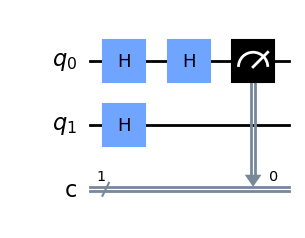

In [25]:
from qiskit import QuantumCircuit
from qiskit.visualization import circuit_drawer

# Create a quantum circuit with two qubits and one classical register
qc_constant = QuantumCircuit(2, 1, name='Constant Oracle')

# Apply Hadamard gates to both qubits
qc_constant.h(range(2))

# Apply no operation to simulate a constant function that always outputs 0

# Apply Hadamard gate to the first qubit
qc_constant.h(0)

# Measure the first qubit and store the result
qc_constant.measure(0, 0)

# Draw the circuit
circuit_drawer(qc_constant, output='mpl')



<h2>Balanced: 

<h5>This circuit represents the scenario where the function is balanced, alternating between 0 and 1. The quantum circuit applies Hadamard gates, simulates a balanced function (using a CNOT gate in this case), and performs a measurement to determine the nature of the function.

These circuits visually illustrate Deutsch's algorithm for the constant and balanced function cases in Qiskit.

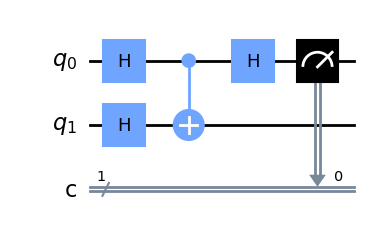

In [27]:
# Create a quantum circuit with two qubits and one classical register
qc_balanced = QuantumCircuit(2, 1, name='Balanced Oracle')

# Apply Hadamard gates to both qubits
qc_balanced.h(range(2))

# Apply a CNOT gate to simulate a balanced function (for demonstration purposes)
qc_balanced.cx(0, 1)  # CNOT gate where qubit 0 is the control and qubit 1 is the target

qc_balanced.h(0)

qc_balanced.measure(0, 0)

# Draw the circuit
circuit_drawer(qc_balanced, output='mpl')


<h2 id="What-is-Quantum-Computing">What is Quantum Computing<h2>

<h5>Quantum computing is an advanced computational paradigm that uses the principles of quantum mechanics to perform computations using quantum bits (qubits). Because qubits can exist in numerous states concurrently due to quantum superposition and entanglement, as opposed to classical computers that use bits (either 0 or 1), quantum computers are able to solve certain problems much quicker than classical computers.
<br>
<br>
Current progress in quantum computing is experimental, and large-scale, reliable quantum computers are not yet realized. Despite promising developments, such as superconductor and ion trap technologies, achieving high-quality qubits with long coherence times and low error rates remains a significant challenge.
<br>
<br>
The power of quantum computers lies in their ability to perform calculations efficiently through quantum algorithms. While classical computers can theoretically solve the same problems, quantum computers have the potential to deliver much faster results for specific tasks. However, not all problems benefit equally from quantum speedups. Quantum complexity theory highlights that tasks like sorting don’t show significant quantum advantage.
<br>
<br>
Quantum computing’s potential has drawn considerable attention, but its practical use cases are currently limited. Claims of "quantum supremacy" demonstrate quantum computers' advantage in specific scenarios, but their broader applicability is yet to be fully realized, especially when considering noise and error correction.




<h2 id="Oracle">Oracle<h2>

<h5>An oracle refers to a theoretical black-box device or function. Oracles are used to perform specific computational tasks or provide information, typically in the form of queries, without revealing the inner workings of the function.

<h3>Classical
<h5>In classical computing, an oracle is typically portrayed as a black box that receives input and outputs data depending on some unidentified function. It's a conceptual tool for describing algorithms or methods for solving problems without giving away the specifics of the algorithm. In complexity theory, for example, an oracle machine could tell us whether a problem is solvable or not, but it wouldn't tell us how the solution is arrived at.

<h3>Quantum
<h5>In quantum computing, an oracle is a crucial component of several quantum algorithms, such as Deutsch-Jozsa algorithm. It's represented as a quantum gate or a quantum circuit that implements a specific function or computation.
<br>
<br>
Black-Box Function: Quantum oracles operate similarly to classical oracles but in a quantum context. They represent a function or transformation that can be implemented in a quantum circuit.
<br>
Unitary Transformation: In quantum computing, an oracle is typically implemented as a unitary transformation acting on qubits. It's a quantum operation that maintains the probability amplitudes of quantum states and is completely reversible.
<br>
Information Hiding: Oracles in quantum computing often hide information about the inner workings of the function being implemented. They provide access to specific computational steps without revealing the function's logic, crucial for quantum algorithms to exploit quantum parallelism and superposition effectively.

<h2 id="Qubits">Qubits<h2>

<h5>A qubit, short for "quantum bit," is the fundamental unit of quantum information, analogous to the classical bit in classical computing. However, unlike classical bits, which can only be in a state of 0 or 1, qubits can exist in superpositions of these classical states.
<br>
<br>
Standard Representation: A qubit's general quantum state in quantum mechanics can be expressed as a linear superposition of its two orthonormal basis states, also known as basis vectors. These two orthonormal basis states, {|0⟩,|1⟩}(Pronoumced Ket 0 and Ket 1), together called the computational basis, are said to span the two-dimensional linear vector (Hilbert) space of the qubit. (Hilbert spaces provide a framework to model the states of quantum systems, where each vector represents a possible state of the system, and the inner product captures the notion of orthogonality and probability amplitudes in quantum mechanics)
<br> 
<br>
Superposition: Superposition is a fundamental property of qubits, allowing them to exist in multiple states simultaneously. It's a key principle that distinguishes qubits from classical bits.
<br>
<br>
Measurement: When a qubit is measured, it collapses from its superposition state to one of the basis states (0 or 1) probabilistically, with the probability of each outcome determined by the squared magnitudes of the amplitudes.
<br>
<br>
Bloch Sphere Representation: The state of a single qubit can be represented geometrically on the Bloch sphere, a unit sphere where the north and south poles represent the basis states ∣0⟩ and ∣1⟩, respectively, and points on the surface represent superposition states.
<br>
<br>
Quantum Entanglement: Qubits can be entangled, meaning the state of one qubit becomes dependent on the state of another, even when they are far apart. This property allows for quantum correlations and enables quantum algorithms like quantum teleportation(a technique for transferring quantum information from a sender at one location to a receiver some distance away) and superdense codiing(communicates a number of classical bits of information by only transmitting a smaller number of qubits, under the assumption of sender and receiver pre-sharing an entangled resource.).


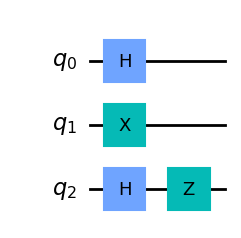

In [43]:
#Representation of qubits

from qiskit import QuantumCircuit
from qiskit.visualization import circuit_drawer

# Create a quantum circuit with 3 qubits
qc = QuantumCircuit(3)

# Apply Hadamard gate to the first qubit
qc.h(0)

# Apply Pauli-X gate (NOT gate) to the second qubit
qc.x(1)

# Apply Hadamard gate followed by a Pauli-Z gate to the third qubit
qc.h(2)
qc.z(2)

# Draw the quantum circuit
circuit_drawer(qc, output='mpl')




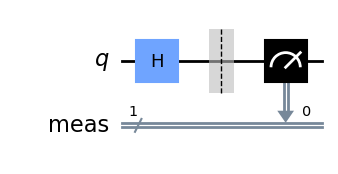

In [45]:
#Basic measurement of qubit

from qiskit import QuantumCircuit
from qiskit.visualization import circuit_drawer

# Create a quantum circuit with 1 qubit
qc = QuantumCircuit(1)

# Apply a Hadamard gate to the qubit
qc.h(0)

# Measure the qubit
qc.measure_all()

# Draw the quantum circuit
circuit_drawer(qc, output='mpl')


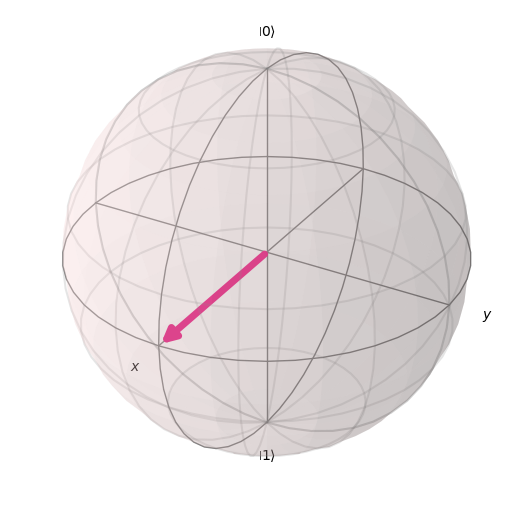

In [47]:
#Bloch Sphere Representation

from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_vector

# Create a quantum circuit with 1 qubit
qc = QuantumCircuit(1)

# Apply a Hadamard gate to the qubit
qc.h(0)

# Visualize the state of the qubit using Bloch sphere
plot_bloch_vector([1, 0, 0])  # Replace [1, 0, 0] with the state vector components if known


<h2 id="Density-Matrix">Density Matrix<h2>

<h5>In quantum mechanics, density matrices are a mathematical tool that are used to describe the state of a quantum system, particularly in situations where the system may not be in a pure state. They offer a more thorough explanation, taking into account mixed states that are not entirely captured by classical probability.

<h3>Pure and Mixed States

<h5>The difference between the density matrix of a pure state and a mixed state is straightforward - the pure state is a special case which can be written in the form ρ=|ψ⟩⟨ψ|
, while a mixed state cannot be written in this form. Mathematically, this means that the density matrix of a pure state has rank 1, while a mixed state has rank greater than 1.
<br>
<br>
Perfect knowledge of the system is correlated with the pure state, but the interesting thing about quantum mechanics is that this does not entail complete knowledge of all conceivable measurement outcomes. Mixed states are indicators of some incomplete knowledge, be it preparation-related or knowledge of a broader Hilbert space.
<br>
The Bloch sphere picture on a single qubit(shown above) shows how much richer the mixed state description is: all pure states are those on the sphere's surface, whereas all mixed states are those included within the volume. When it comes to counting parameters, you require three instead of two, with the additional parameter equal to the length of the Bloch vector.

<h2 id="Quantum-Gates">Quantum Gates<h2>

<h5>Just as classical logic gates are the building blocks of classical computing, quantum gates are the building blocks of quantum circuits. By applying particular quantum operations, they modify qubits and change their quantum state. Below are some examples of gates used in this project.

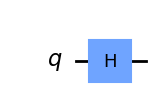

In [1]:
# The Hadamard gate creates superposition, putting qubits 
# into an equal probability combination of 0 and 1.

from qiskit import QuantumCircuit
from qiskit.visualization import circuit_drawer

# Create a quantum circuit with 1 qubit
qc = QuantumCircuit(1)

# Apply Hadamard gate to the qubit
qc.h(0)

# Draw the quantum circuit
circuit_drawer(qc, output='mpl')


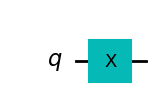

In [3]:
# The X gate is equivalent to a classical NOT gate, 
# flipping the qubit from |0⟩ to |1⟩ and vice versa.

from qiskit import QuantumCircuit
from qiskit.visualization import circuit_drawer

# Create a quantum circuit with 1 qubit
qc = QuantumCircuit(1)

# Apply Pauli-X gate to the qubit
qc.x(0)

# Draw the quantum circuit
circuit_drawer(qc, output='mpl')


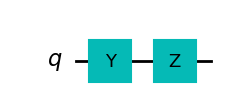

In [5]:
# The Y and Z gates are also Pauli gates, 
# performing rotations around the Y and Z axes on the Bloch sphere, respectively.

from qiskit import QuantumCircuit
from qiskit.visualization import circuit_drawer

# Create a quantum circuit with 1 qubit
qc = QuantumCircuit(1)

# Apply Pauli-Y gate to the qubit
qc.y(0)

# Apply Pauli-Z gate to the qubit
qc.z(0)

# Draw the quantum circuit
circuit_drawer(qc, output='mpl')


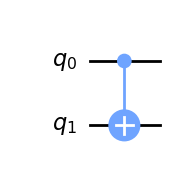

In [7]:
# The CNOT gate performs a conditional operation, 
# flipping the second qubit (target) if the first qubit (control) is |1⟩.

from qiskit import QuantumCircuit
from qiskit.visualization import circuit_drawer

# Create a quantum circuit with 2 qubits
qc = QuantumCircuit(2)

# Apply a CNOT gate with qubit 0 as control and qubit 1 as target
qc.cx(0, 1)

# Draw the quantum circuit
circuit_drawer(qc, output='mpl')


<h2 id="Deutsch-Algorithm-in-Full">Deutsch Algorithm in Full<h2>

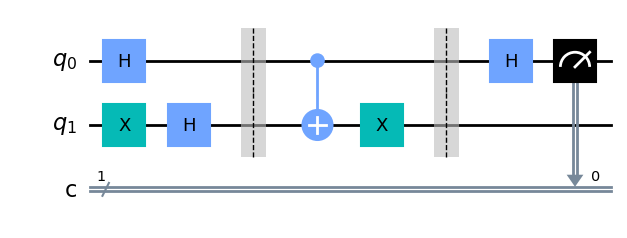

In [8]:
from qiskit import QuantumCircuit
from qiskit.visualization import circuit_drawer

def deutsch_function(case: int):
    
    # Generate a valid Deutsch function as a `QuantumCircuit`.
    
    if case not in [1, 2, 3, 4]:
        raise ValueError("`case` must be 1, 2, 3, or 4.")

    f = QuantumCircuit(2)
    if case in [2, 3]:
        f.cx(0, 1)
    if case in [3, 4]:
        f.x(1)
    return f

def compile_circuit(function: QuantumCircuit):
    
   # Compiles a circuit for use in Deutsch's algorithm.
    
    n = function.num_qubits - 1
    qc = QuantumCircuit(n + 1, n)

    qc.x(n)
    qc.h(range(n + 1))

    qc.barrier()
    qc.compose(function, inplace=True)
    qc.barrier()

    qc.h(range(n))
    qc.measure(range(n), range(n))

    return qc

# Generate and compile the Deutsch circuit for a specific function
compiled_circuit = compile_circuit(deutsch_function(3))

# Visualize the compiled circuit
circuit_drawer(compiled_circuit, output='mpl')


<h2 id="Conclusion">Conclusion<h2>

<h5>This Jupyter Notebook goes into Deutsch's Algorithm, showing how quantum computing outshines classical methods in certain computational challenges. It simplifies complex quantum concepts like superposition and entanglement, along with using quantum gates, to highlight the strength of quantum algorithms over classical ones. With clear explanations and practical code examples, this project serves as a fundamental guide to grasp the intricacies of Deutsch's Algorithm. It's a stepping stone towards understanding the immense potential and possibilities of quantum computation.

<h2 id="References">References<h2>

<h4>
<a href="https://github.com/ianmcloughlin/notes">Emerging Technologies Notes</a>
<br>
<a href="https://learning.quantum.ibm.com/course/basics-of-quantum-information">Quantum Information/Code Assistance</a>
<br>
<a href="https://en.wikipedia.org/wiki/Qubit">Qubits</a>
<br>
<a href="https://quantumcomputing.stackexchange.com/questions/4625/what-exactly-is-an-oracle">Oracles</a>
<br>
<a href="https://en.wikipedia.org/wiki/Density_matrix">Density Matrix</a>
<br>
<a href="https://quantumcomputing.stackexchange.com/questions/2347/density-matrices-for-pure-states-and-mixed-states">Pure and Mixed states(Density Matrices)</a>
<br>
<a href="https://en.wikipedia.org/wiki/Quantum_computing">Quantum Computing</a>
<br>
<a href="https://docs.quantum.ibm.com/build">Code Assistance</a>
<br>
<a href="https://en.wikipedia.org/wiki/List_of_quantum_logic_gates">Quantum Gates</a>
